# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
from google.colab import drive 
drive.mount('/content/drive')

#ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph = gpd.read_file('/content/drive/MyDrive/datasci/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

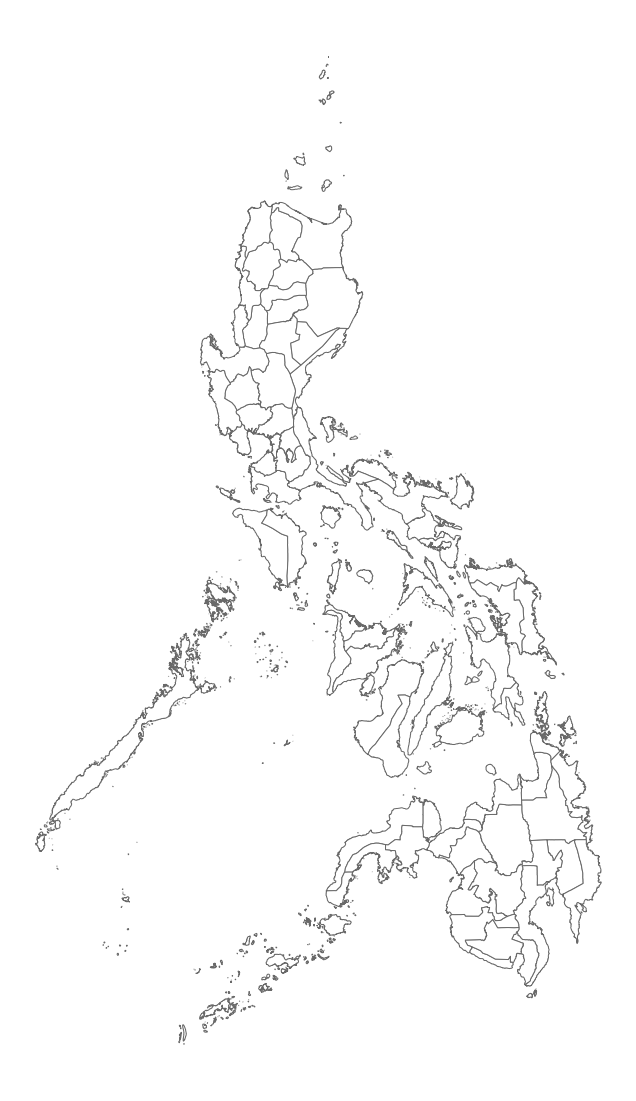

In [4]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [5]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/drive/MyDrive/datasci/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

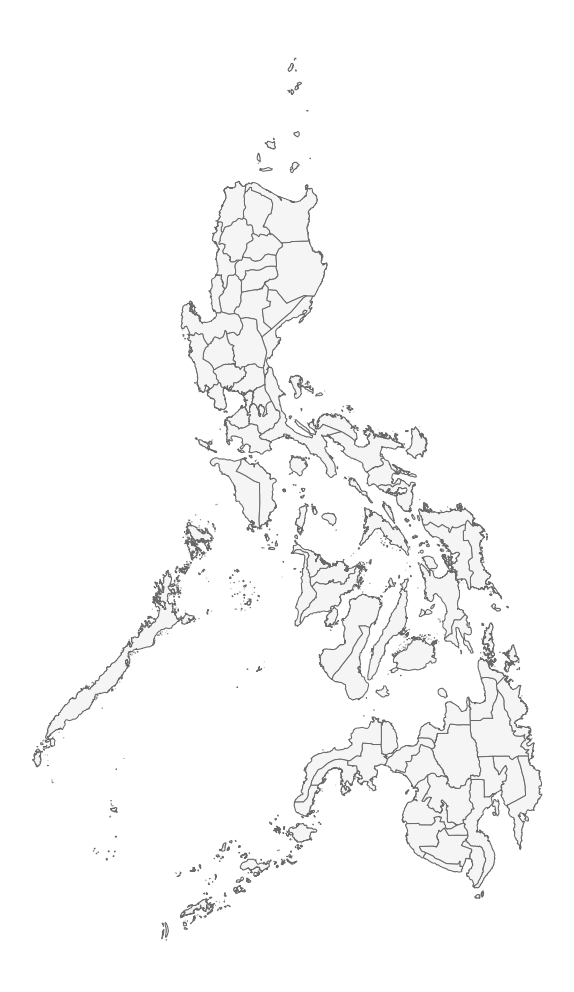

In [6]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

Most of my relatives are from Metro Manila, but I have some in Laguna, Cavite

In [7]:
clinic = healthsites[healthsites.amenity=='clinic']
dentist = healthsites[healthsites.amenity=='dentist']
doctor = healthsites[healthsites.amenity=='doctors']
healthcare = healthsites[healthsites.amenity=='healthcare']
hospital = healthsites[healthsites.amenity=='hospital']
laboratory = healthsites[healthsites.amenity=='laboratory']
other = healthsites[healthsites.amenity=='']
pharmacy = healthsites[healthsites.amenity=='pharmacy']
social = healthsites[healthsites.amenity=='social_facility']

## Metro Manila

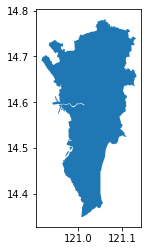

In [8]:
metro = ph[(ph.NAME_1 == "Metropolitan Manila")]
metro.plot()

In [9]:
metro_clinic = gpd.sjoin(clinic, metro, op='within')
metro_dentist = gpd.sjoin(dentist, metro, op='within')
metro_doctor = gpd.sjoin(doctor, metro, op='within')
metro_healthcare = gpd.sjoin(healthcare, metro, op='within')
metro_hospital = gpd.sjoin(hospital, metro, op='within')
metro_laboratory = gpd.sjoin(laboratory, metro, op='within')
metro_other = gpd.sjoin(other, metro, op='within')
metro_pharmacy = gpd.sjoin(pharmacy, metro, op='within')
metro_social = gpd.sjoin(social, metro, op='within')

Count: 532


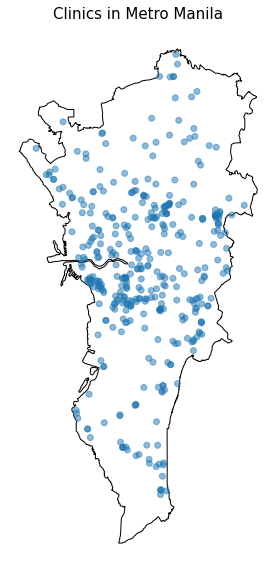

In [10]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_clinic.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_clinic.osm_id.count())
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_clinic.png")

Count: 228


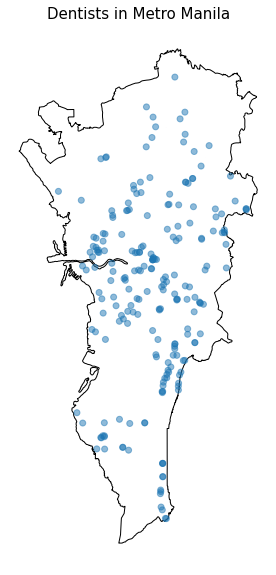

In [11]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_dentist.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_dentist.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_dentist.png")

Count: 53


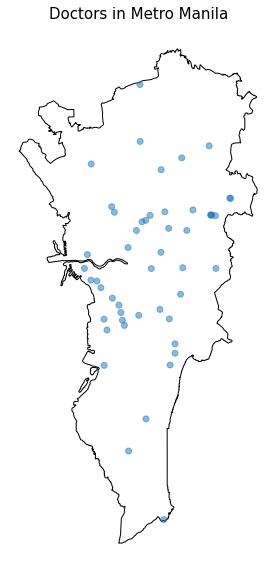

In [12]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_doctor.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_doctor.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_doctor.png")

Count: 1


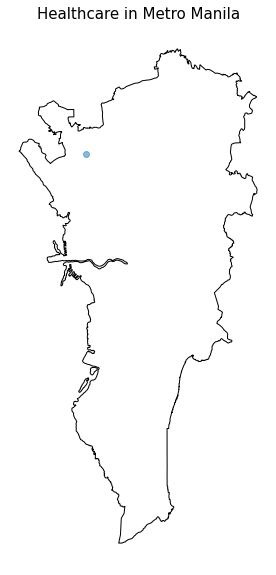

In [13]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_healthcare.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Healthcare in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_healthcare.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_healthcare.png")

Count: 286


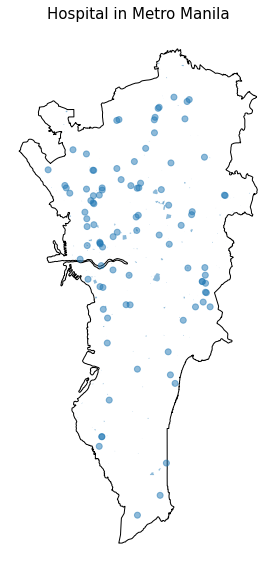

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_hospital.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Hospital in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_hospital.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_hospital.png")

Count: 0


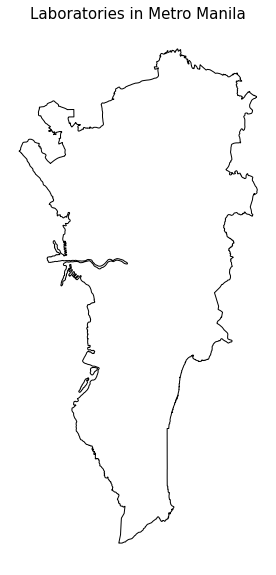

In [15]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Laboratories in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_laboratory.osm_id.count()) 
#There are no labs in Metro Manila so I just displayed an Empty plot
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_laboratory.png")

Count: 160


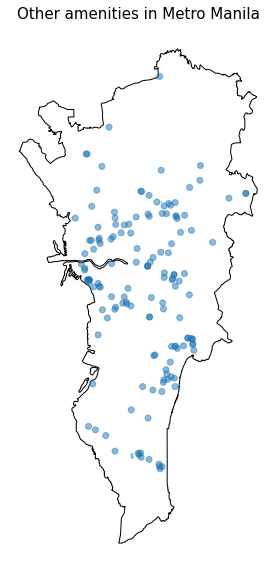

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_other.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Other amenities in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_other.osm_id.count())
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_other.png") 

Count: 957


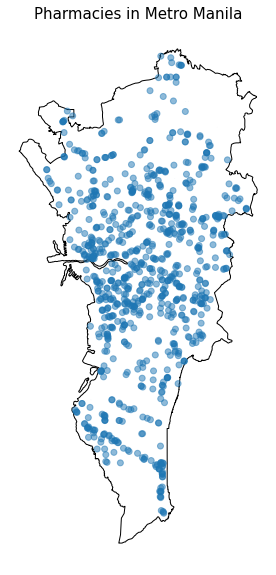

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
metro_pharmacy.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_pharmacy.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_pharmacy.png")

Count: 0


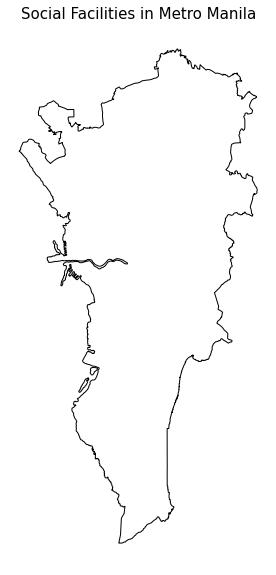

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
metro.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Social Facilities in Metro Manila', fontsize=15)
ax.axis('off');
print("Count:", metro_social.osm_id.count())
plt.savefig(f"/content/drive/MyDrive/datasci/images/ncr/metro_social.png")
#There are no social facilities in Metro Manila so I just displayed an Empty plot

## Cavite

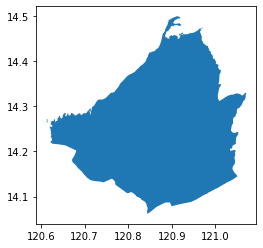

In [19]:
cavite = ph[(ph.NAME_1 == "Cavite")]
cavite.plot()

In [20]:
cav_clinic = gpd.sjoin(clinic, cavite, op='within')
cav_dentist = gpd.sjoin(dentist, cavite, op='within')
cav_doctor = gpd.sjoin(doctor, cavite, op='within')
cav_healthcare = gpd.sjoin(healthcare, cavite, op='within')
cav_hospital = gpd.sjoin(hospital, cavite, op='within')
cav_laboratory = gpd.sjoin(laboratory, cavite, op='within')
cav_other = gpd.sjoin(other, cavite, op='within')
cav_pharmacy = gpd.sjoin(pharmacy, cavite, op='within')
cav_social = gpd.sjoin(social, cavite, op='within')

Count: 71


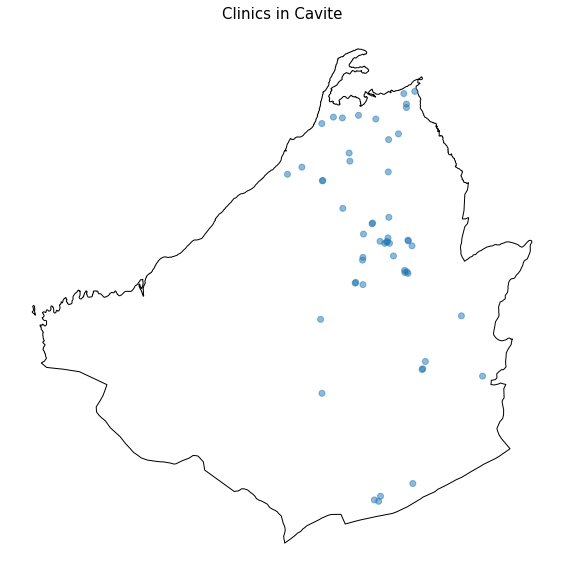

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_clinic.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Clinics in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_clinic.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_clinic.png")

Count: 49


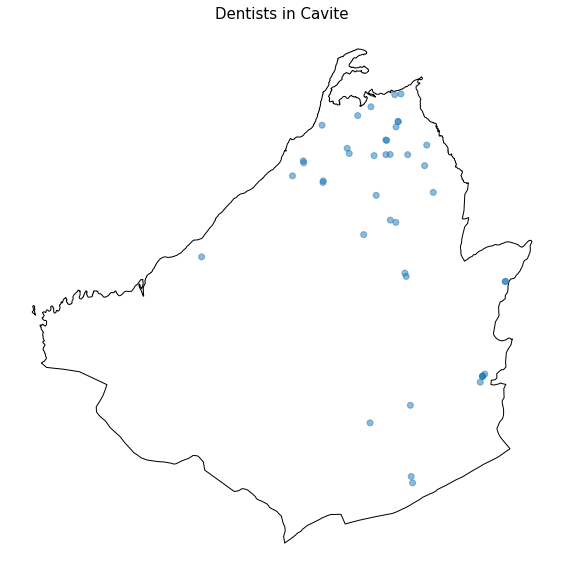

In [22]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_dentist.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Dentists in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_dentist.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_dentist.png")

Count: 15


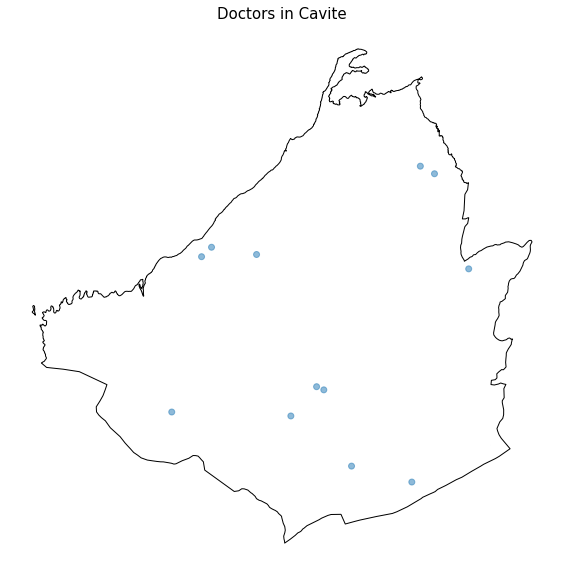

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_doctor.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Doctors in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_doctor.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_doctor.png")

Count: 0


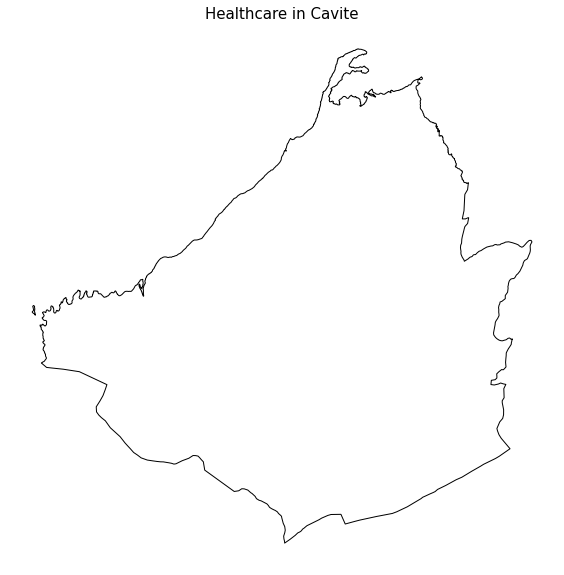

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Healthcare in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_healthcare.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_healthcare.png")
#There are no healthcare ameneties in Cavite so I displayed an Empty plot

Count: 92


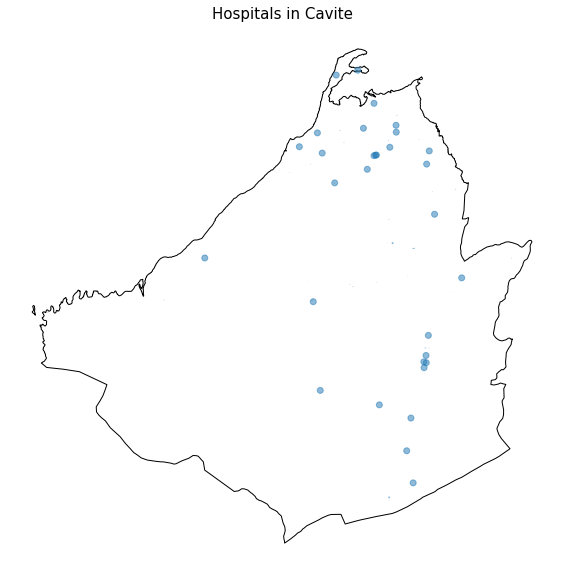

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_hospital.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Hospitals in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_hospital.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_hospital.png")

Count: 0


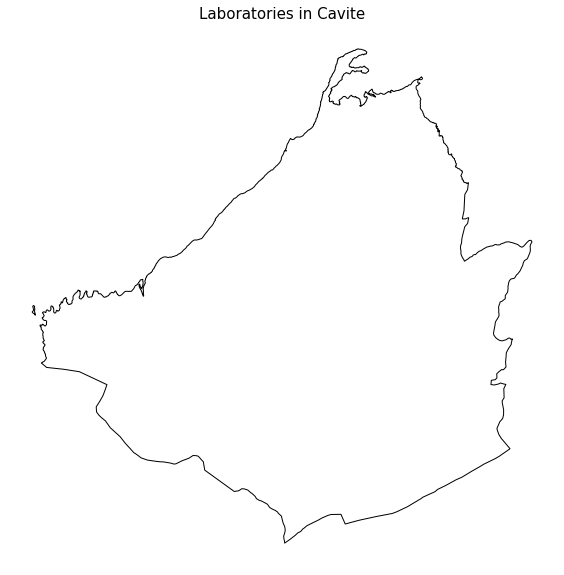

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Laboratories in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_laboratory.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_laboratory.png")
#There are no labs in Cavite so I displayed an Empty plot

Count: 9


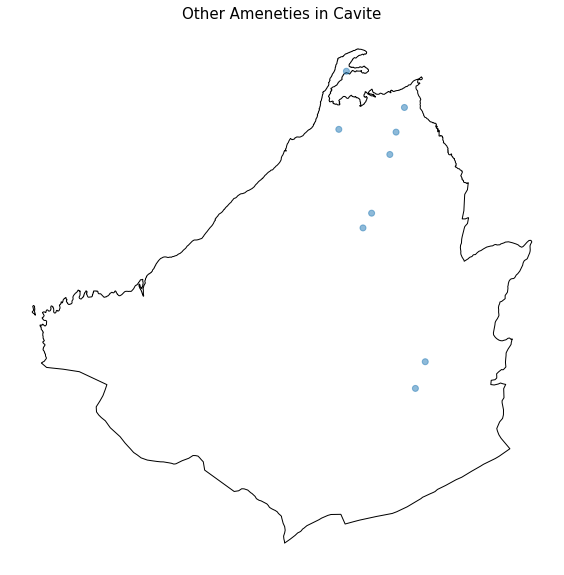

In [27]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_other.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Other Ameneties in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_other.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_other.png")

Count: 201


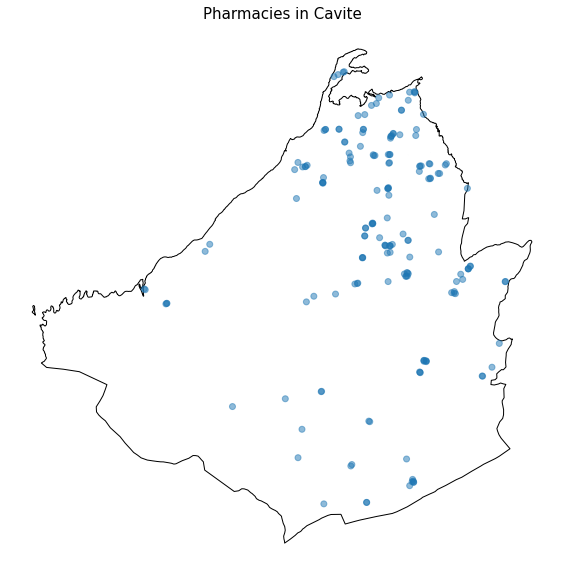

In [28]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
cav_pharmacy.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Pharmacies in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_pharmacy.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_pharmacy.png")

Count: 0


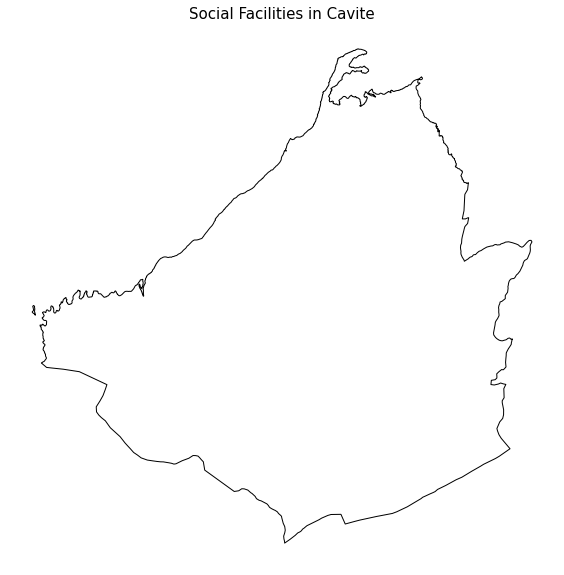

In [29]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
cavite.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Social Facilities in Cavite', fontsize=15)
ax.axis('off');
print("Count:", cav_social.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/cavite/cavite_social.png")
#There are no Social Facilities in Cavite so I displayed an Empty plot

## Laguna

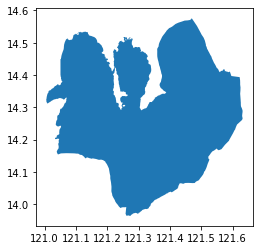

In [30]:
laguna = ph[(ph.NAME_1 == "Laguna")]
laguna.plot()

In [31]:
lag_clinic = gpd.sjoin(clinic, laguna, op='within')
lag_dentist = gpd.sjoin(dentist, laguna, op='within')
lag_doctor = gpd.sjoin(doctor, laguna, op='within')
lag_healthcare = gpd.sjoin(healthcare, laguna, op='within')
lag_hospital = gpd.sjoin(hospital, laguna, op='within')
lag_laboratory = gpd.sjoin(laboratory, laguna, op='within')
lag_other = gpd.sjoin(other, laguna, op='within')
lag_pharmacy = gpd.sjoin(pharmacy, laguna, op='within')
lag_social = gpd.sjoin(social, laguna, op='within')

Count: 77


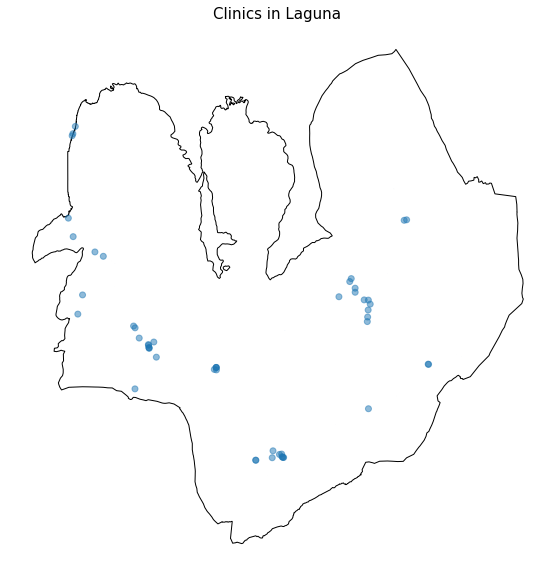

In [32]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_clinic.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Clinics in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_clinic.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_clinic.png")

Count: 57


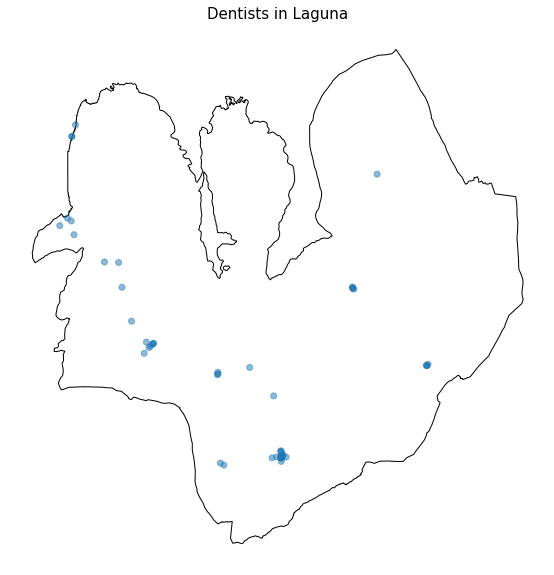

In [33]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_dentist.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Dentists in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_dentist.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_dentist.png")

Count: 40


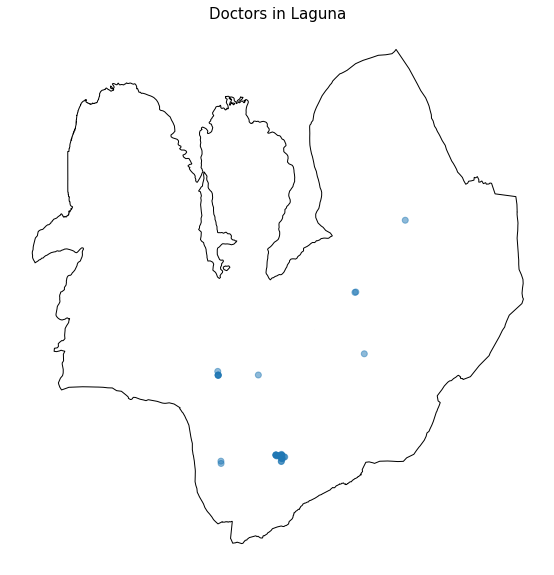

In [34]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_doctor.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Doctors in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_doctor.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_doctor.png")

Count: 0


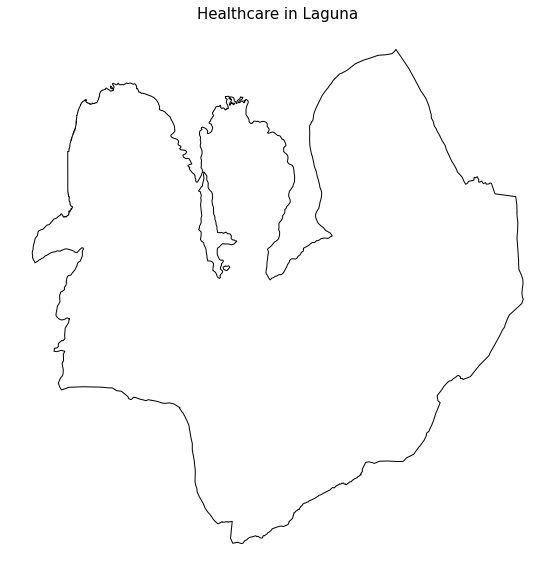

In [35]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Healthcare in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_healthcare.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_healthcare.png")
#There are no Healthcares in Laguna so I displayed an Empty plot

Count: 61


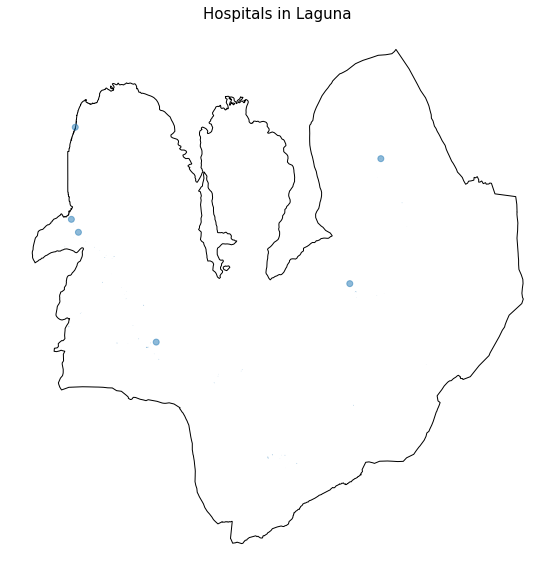

In [36]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_hospital.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Hospitals in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_hospital.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_hospital.png")

Count: 0


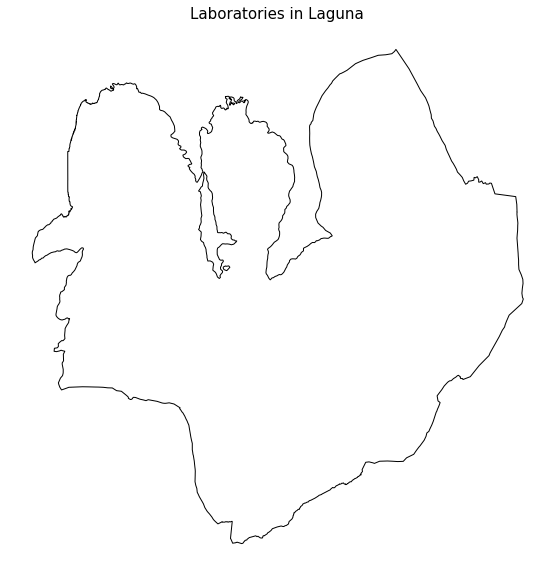

In [37]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Laboratories in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_laboratory.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_laboratory.png")
#There are no labs in Laguna so I displayed an Empty plot

Count: 10


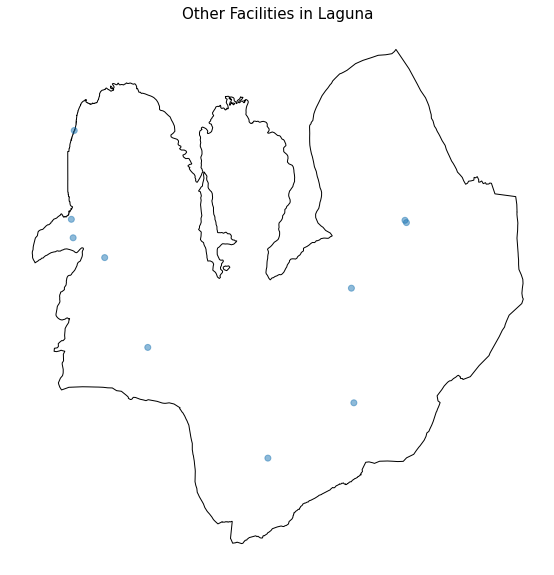

In [38]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_other.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Other Facilities in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_other.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_other.png")

Count: 204


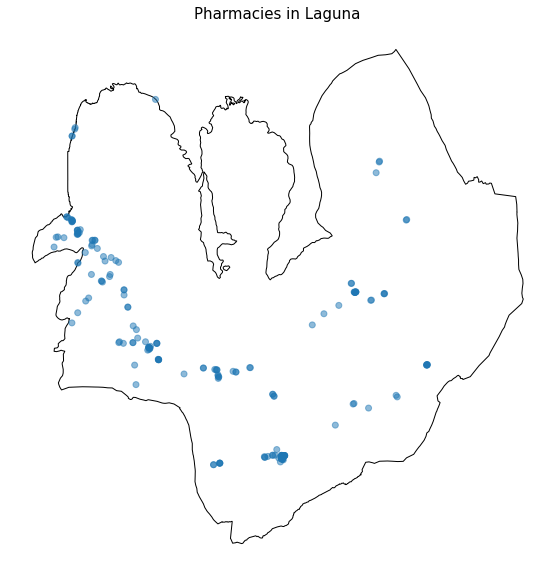

In [39]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
lag_pharmacy.plot(ax=ax, column="amenity", alpha=0.5)
ax.set_title('Pharmacies in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_pharmacy.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_pharmacy.png")

Count: 0


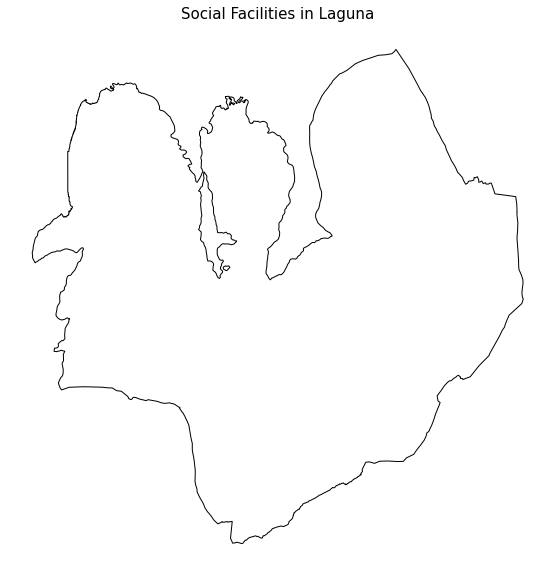

In [40]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
laguna.plot( ax =ax,color='white', edgecolor='black')
ax.set_title('Social Facilities in Laguna', fontsize=15)
ax.axis('off');
print("Count:", lag_social.osm_id.count()) 
plt.savefig(f"/content/drive/MyDrive/datasci/images/laguna/laguna_social.png")
#There are no Social Facilities in Laguna so I displayed an Empty plot